<a href="https://colab.research.google.com/github/sanu1230/Personal_Projects/blob/master/Finance_Bank_Fixed_deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict who will opt for Fixed Deposit

## Client Requirement

The dataset is about a marketing campaign of a bank, looking to analyze different ways to look for future strategies in order to improve future marketing campaigns for the bank. The data set is imbalanced with 4521 instances and 17 columns.


## Attributes:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 Response Variable (desired target):__

17 - y - has the client subscribed to a __Fixed_deposit?__ (binary: "yes","no")

## Objective

The Objective of this analysis is to Predict who will do a Term Deposit in the Financial Institution

## Importing necessary packages

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC   
from sklearn.preprocessing import StandardScaler    

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Dataset

In [2]:
!wget https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day3/Termdeposit.zip

--2020-08-12 17:46:08--  https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day3/Termdeposit.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65374 (64K) [application/zip]
Saving to: ‘Termdeposit.zip’

Termdeposit.zip     100%[===================>]  63.84K  --.-KB/s    in 0.03s   

2020-08-12 17:46:08 (2.29 MB/s) - ‘Termdeposit.zip’ saved [65374/65374]



In [3]:
!unzip Termdeposit.zip

Archive:  Termdeposit.zip
  inflating: Bank_Term_Deposit_Train.csv  
  inflating: Day1_Actual_output.xls  
  inflating: Day1_input.xls          
  inflating: Day2_Actual_output.xls  
  inflating: Day2_input.xls          
  inflating: Day3_Actual_output.xls  
  inflating: Day3_input.xls          
  inflating: Day4_Actual_output.xls  
  inflating: Day4_input.xls          


In [4]:
df=pd.read_csv("Bank_Term_Deposit_Train.csv")           

In [5]:
pd.options.display.max_columns=None  

In [6]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
del df['Unnamed: 0']        # Removing the first column

In [8]:
df.shape    # Checking the number of rows and columns

(4413, 17)

## Understanding datatypes

In [9]:
df.info() # Checking the info, missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4413 non-null   int64 
 1   job        4413 non-null   object
 2   marital    4413 non-null   object
 3   education  4413 non-null   object
 4   default    4413 non-null   object
 5   balance    4413 non-null   int64 
 6   housing    4413 non-null   object
 7   loan       4413 non-null   object
 8   contact    4413 non-null   object
 9   day        4413 non-null   int64 
 10  month      4413 non-null   object
 11  duration   4413 non-null   int64 
 12  campaign   4413 non-null   int64 
 13  pdays      4413 non-null   int64 
 14  previous   4413 non-null   int64 
 15  poutcome   4413 non-null   object
 16  y          4413 non-null   object
dtypes: int64(7), object(10)
memory usage: 586.2+ KB


In [10]:
df.isnull().sum()                                                                    # Checking the missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.y.value_counts()                                                                 # Find the total number of observations across all the classes given in Output var

no     3904
yes     509
Name: y, dtype: int64

In [ ]:
df.describe()                                                                      # Checking the descriptive statistics

,age,balance,day,duration,campaign,pdays,previous
count,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000
mean,41.203716,1419.201224,15.921142,263.663494,2.800136,39.455472,0.537729
std,10.577605,3008.200835,8.252401,259.753338,3.124920,99.893990,1.689185
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1472.000000,21.000000,330.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Data Visualization

### Account 'balance' & 'education' of customers based on 'FD' results.

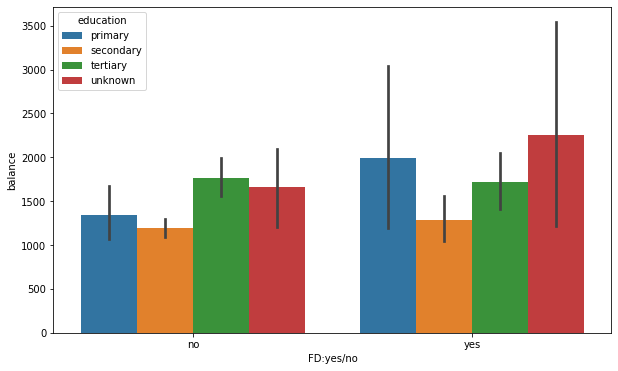

In [13]:
plt.figure(figsize=[10,6])                                     
sns.barplot(y=df['balance'], x=df['y'], hue=df.education)     
plt.xlabel("FD:yes/no")              
plt.show()             

People who have term deposit have more balance in bank.  <br> 
This is because term deposit is a good investment scheme with high rate of interest.  <br>
People who have term deposit are more educated.

### Customers 'age' &'education' based on 'FD' results

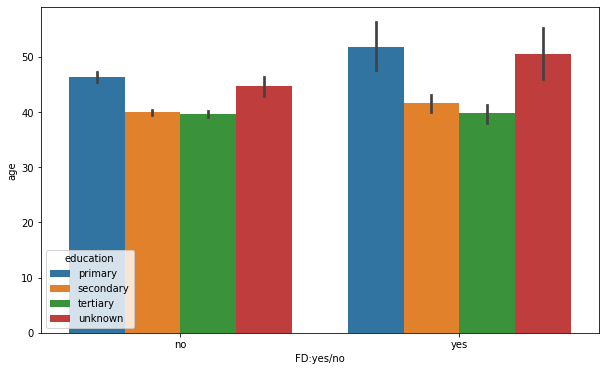

In [14]:
plt.figure(figsize=[10, 6]) 
sns.barplot(y=df['age'], x=df['y'], hue=df.education)
plt.xlabel("FD:yes/no")    
plt.show()                                          

People who have term deposit have more age.  <br>
It can be deduced that aged people create term deposit to save their retirement benefit.

### FD marketing campaign result distribution based on customers account 'balance' and if any 'personal loan'.

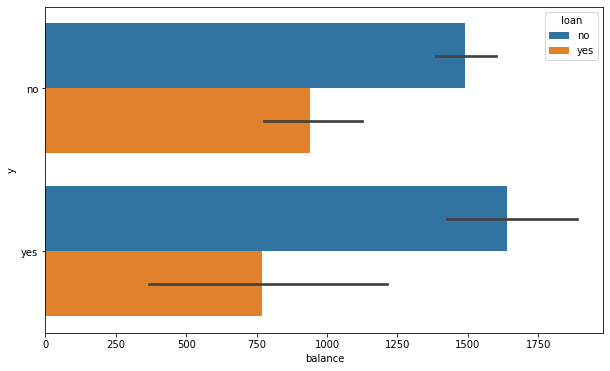

In [16]:
plt.figure(figsize=[10,6])                            
sns.barplot(y=df['y'],x=df['balance'], hue=df.loan)    
plt.show()

Those who have annual balance is close to 1500 euro and don't have loan are not doing Term Deposit. We should inspect more which factors are prohibiting them from doing a Term Deposit

### Finding Outliers

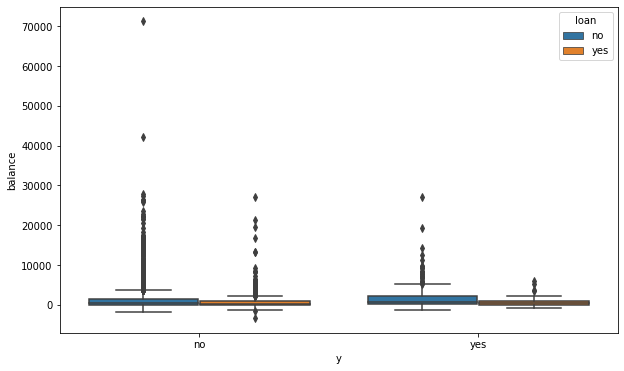

In [17]:
plt.figure(figsize=[10, 6])                                           # Setting the size of the figure
sns.boxplot(x=df.y, y=df.balance, hue=df.loan)                         # Bar plot
plt.show()

We find some outliers in Annual balance in those who are not doing TD and having no loan

### Finding people with good savings and less responsibility and exp and still no FD

In [18]:
df[df.loan=='no'][df.y=='no'][df.balance>=1000][df.marital=='single'].shape[0] # 293 people having no loan,single and annual
# greater than equal to 1000 are not doing Term Deposit.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


293

### Distribution of Age

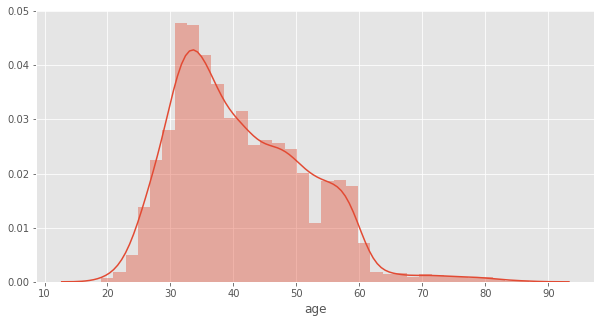

In [19]:
# Distribution plot of Age

from matplotlib import style
plt.figure(figsize=[10,5])
style.use('ggplot')
sns.distplot(df['age'])
plt.show()

### Distribution of balance

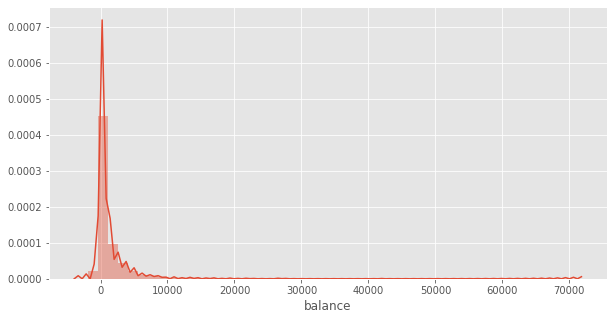

In [20]:
# Distribution plot of balance

from matplotlib import style
plt.figure(figsize=[10,5])
style.use('ggplot')
sns.distplot(df['balance'])
plt.show()

Balance variable is highly skewed to the right. Max number of people having low annual balance

### Let's see how our Output variable looks like

In [21]:
df.y.value_counts()                       # Checking the number of values for each class

no     3904
yes     509
Name: y, dtype: int64

In [22]:
no=df['y']=='no'#.size()
no=no.sum()
yes=df['y']=='yes'
yes=yes.sum()

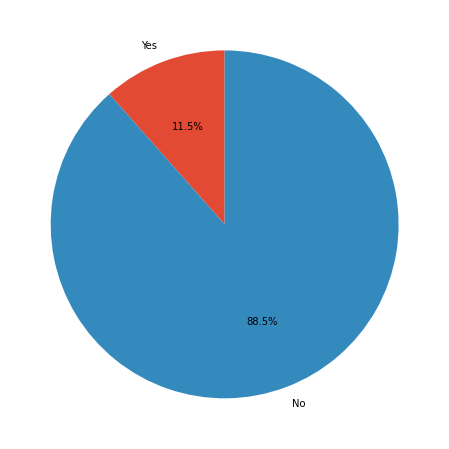

In [24]:
# Pie chart of both the classes

plt.figure(figsize=[8, 8])
variables=['Yes','No']
values=[yes,no]
plt.pie(values,labels=variables, autopct='%1.1f%%', startangle=90, )
plt.show()

In [25]:
df.shape # Checking the number of rows and columns in the dataframe

(4413, 17)

## One-Hot-Encoding

In [26]:
# Creating features and the labels

X=df.drop(['y'],1)
y=df['y']

In [27]:
x=X.copy()

In [28]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [29]:
# Getting the dummy values of categorical features.

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

encoded_cols = pd.get_dummies(X[cat_cols], drop_first=True)

encoded_cols.shape

(4413, 35)

In [30]:
# Merge all the dummified categorical columns

X_encoded = X.drop(cat_cols, axis=1)
X_encoded = pd.concat([X_encoded, encoded_cols],1)

X_encoded.shape

(4413, 42)

In [31]:
X_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Checking the shape of input and output variables

In [32]:
y.shape

(4413,)

In [33]:
X_encoded.shape

(4413, 42)

### Label Encoding

In [34]:
# Label Encoding the y variable

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
y=le.fit_transform(y)

In [36]:
pd.crosstab(y,'Count') # This shows that the dataset is imbalanced and we need to perform SMOTE

col_0,Count
row_0,
0,3904
1,509


## Handling imbalanced data using SMOTE

**Using SMOTE**
- We'll do over-sampling thus increase the number of instances while balancing the dataset

In [38]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority')
x_sm, y_sm = smote.fit_sample(X_encoded, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [39]:
print(x_sm.shape)
print(y_sm.shape)

(7808, 42)
(7808,)


In [40]:
# Splitting the data into train and test set and checking their shape

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.30,random_state=12)

print('X_train', x_train.shape)
print('y_train', y_train.shape)
print('X_test', x_test.shape)
print('y_test', y_test.shape)

X_train (5465, 42)
y_train (5465,)
X_test (2343, 42)
y_test (2343,)


In [41]:
pd.Series(y_sm).value_counts() # After SMOTE the classes are balanced

1    3904
0    3904
dtype: int64

In [42]:
pd.Series(y_test).value_counts()

1    1198
0    1145
dtype: int64

## LightGBM Model

In [43]:
import lightgbm as lgb

In [45]:
train_data = lgb.Dataset(x_train, label=y_train)

params = {}
params['learning_rate'] = 0.003                      # Learning rate 
params['boosting_type'] = 'gbdt'                     # Gradient Boosting Decision Tree
params['objective'] = 'binary'                       # Classify into binary classes
params['metric'] = 'binary_logloss'                  # metric is binary logloss
params['sub_feature'] = 0.5                          
params['num_leaves'] = 15                            # number of leaves in a full tree
params['min_data'] = 50                              # minimum number of data in the last leaf 
params['max_depth'] = 10                             # depth of tree


clf = lgb.train(params, train_data, 200)             # Train the model for 200 iteration

### Prediction  of train data

In [46]:
train_pred = clf.predict(x_train)

In [47]:
#convert into binary values
for i in range(0,5465):         # 6246 is the number of records
    if train_pred[i]>=.5:       # setting threshold to .5
       train_pred[i]=1
    else:  
       train_pred[i]=0

In [48]:
train_pred

array([1., 0., 1., ..., 0., 1., 1.])

### Prediction on test data

In [49]:
lightgbm_pred=clf.predict(x_test)

In [50]:
y_pred=clf.predict(x_test)
#convert into binary values
for i in range(0,2343):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [51]:
y_pred

array([0., 1., 0., ..., 1., 1., 0.])

### Train performance

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_train, train_pred))            # Accuracy of the model

0.9147301006404391


In [53]:
print(confusion_matrix(y_train, train_pred))

[[2566  193]
 [ 273 2433]]


In [54]:
print(classification_report(y_train, train_pred))     

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2759
           1       0.93      0.90      0.91      2706

    accuracy                           0.91      5465
   macro avg       0.92      0.91      0.91      5465
weighted avg       0.92      0.91      0.91      5465



### Test performance

In [55]:
# Checking all the metrics for the Test data

print(confusion_matrix(y_test, y_pred))                                # Print confusion matrix

accuracy=accuracy_score(y_pred,y_test)

print('\n accuracy_score \n',accuracy_score(y_test,y_pred))

print('\n classification_report \n',classification_report(y_test,y_pred))

[[1062   83]
 [ 138 1060]]

 accuracy_score 
 0.9056764831412719

 classification_report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1145
           1       0.93      0.88      0.91      1198

    accuracy                           0.91      2343
   macro avg       0.91      0.91      0.91      2343
weighted avg       0.91      0.91      0.91      2343



### Recall Score

In [56]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8848080133555927

# Prediction for upcoming four days

## Day 1 prediction

### Import Day 1 data

In [59]:
day1=pd.read_csv('Day1_input.xls')
day1.shape

(27, 16)

In [60]:
day1.tail()  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,60,admin.,married,unknown,no,1088,yes,no,cellular,26,may,149,1,-1,0,unknown
23,37,technician,single,secondary,no,228,yes,no,cellular,20,aug,1740,2,-1,0,unknown
24,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown
25,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown
26,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown


### Feature Engineering - Day 1

In [61]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [62]:
'''since, in the day1 data the features do not all the values as in the df data; 
to get all 42 features after one-hot-coding we will merge the day1 data with the df data'''

df_day1 = pd.concat([X, day1], axis=0)
df_day1.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,60,admin.,married,unknown,no,1088,yes,no,cellular,26,may,149,1,-1,0,unknown
23,37,technician,single,secondary,no,228,yes,no,cellular,20,aug,1740,2,-1,0,unknown
24,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown
25,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown
26,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown


In [63]:
# Dummify categorical features 

encoded_day1 = pd.get_dummies(df_day1[cat_cols], drop_first=True)
encoded_day1.shape

(4440, 35)

In [64]:
df_day1 = df_day1.drop(cat_cols, 1)
day1df = pd.concat([df_day1, encoded_day1], 1)
day1df.shape


(4440, 42)

In [65]:
day1df = day1df[-27:]
day1df.shape

(27, 42)

### Predicting day1 data

In [66]:
day1_pred=clf.predict(day1df)

In [67]:
for i in range(0, 27):
    if day1_pred[i]>=.5:       # setting threshold to .5
       day1_pred[i]=1
    else:  
       day1_pred[i]=0

We have received actually what happend on day1(Actual day1_output)

In [68]:
day1_actual=pd.read_csv('Day1_Actual_output.xls')

In [69]:
day1_actual=le.fit_transform(day1_actual)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
print(classification_report(day1_actual, day1_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.38      1.00      0.55         3

    accuracy                           0.81        27
   macro avg       0.69      0.90      0.71        27
weighted avg       0.93      0.81      0.85        27



In [71]:
print(confusion_matrix(day1_actual, day1_pred))

[[19  5]
 [ 0  3]]


In [72]:
day1_recall=recall_score(day1_actual, day1_pred)
day1_recall

1.0

## Day 2 prediction

In [73]:
day2=pd.read_csv('Day2_input.xls')

In [74]:
day2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,28,technician,single,tertiary,no,0,yes,no,unknown,4,jun,205,6,-1,0,unknown
1,43,blue-collar,married,primary,no,2519,yes,no,cellular,16,apr,257,2,146,9,other
2,33,blue-collar,married,primary,no,3074,no,no,cellular,18,nov,679,1,-1,0,unknown
3,46,admin.,married,secondary,no,-121,yes,yes,cellular,8,jul,214,4,-1,0,unknown
4,40,admin.,divorced,secondary,no,212,no,no,unknown,7,jan,176,1,-1,0,unknown


In [75]:
day2.shape

(27, 16)

### Feature Engineering - Day 2

In [79]:
day2_df = X.append(day2)

In [80]:
day2_df.shape

(4440, 16)

In [81]:
# Dummify categorical features 

encoded_day2 = pd.get_dummies(day2_df[cat_cols], drop_first=True)
encoded_day2.shape

(4440, 35)

In [84]:
day2_df = day2_df.drop(cat_cols, 1)
day2df = pd.concat([day2_df, encoded_day2], 1)
day2df = day2df[-27:]
day2df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,28,0,4,205,6,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,43,2519,16,257,2,146,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,3074,18,679,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,46,-121,8,214,4,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,40,212,7,176,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [85]:
day2df.shape

(27, 42)

### Predicting day 2 data

In [86]:
day2_pred=clf.predict(day2df)

In [87]:
for i in range(0, 27):
    if day2_pred[i]>=.5:       # setting threshold to .5
       day2_pred[i]=1
    else:  
       day2_pred[i]=0

We have received actual what happend on day2(Actual day2_output)

In [88]:
day2_Actual=pd.read_csv('Day2_Actual_output.xls')

In [90]:
day2_actual=le.fit_transform(day2_Actual)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
print(classification_report(day2_actual, day2_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.50      0.33      0.40         3

    accuracy                           0.89        27
   macro avg       0.71      0.65      0.67        27
weighted avg       0.87      0.89      0.88        27



In [92]:
print(confusion_matrix(day2_actual, day2_pred))

[[23  1]
 [ 2  1]]


In [93]:
day2_recall=recall_score(day2_actual, day2_pred)
day2_recall

0.3333333333333333

## Day 3 prediction

In [94]:
day3=pd.read_csv('Day3_input.xls')

In [96]:
day3.shape

(27, 16)

In [97]:
day3.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,58,unemployed,married,secondary,no,610,yes,no,telephone,29,jul,246,2,-1,0,unknown
23,34,admin.,married,tertiary,no,35,yes,no,cellular,15,oct,76,1,69,2,failure
24,33,management,married,secondary,no,3935,yes,no,cellular,6,may,765,1,342,2,failure
25,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success
26,45,blue-collar,divorced,primary,no,844,no,no,unknown,5,jun,1018,3,-1,0,unknown


#### Feature Engineering - Day 3

In [102]:
day3_df = X.append(day3)
day3_df.shape

(4440, 16)

In [103]:
# Dummify categorical features 

encoded_day3 = pd.get_dummies(day3_df[cat_cols], drop_first=True)
day3_df = day3_df.drop(cat_cols, 1)
day3df = pd.concat([day3_df, encoded_day2], 1)
day3df = day2df[-27:]
day3df.shape

(27, 42)

#### Predicting day 3 data

We have received data of day 3(Input features) and we will predict the labels using clf model

In [104]:
day3_pred=clf.predict(day3df)

In [105]:
for i in range(0,27):
    if day3_pred[i]>=.5:       # setting threshold to .5
       day3_pred[i]=1
    else:  
       day3_pred[i]=0

We have received actual what happend on day3(Actual day3_output)

In [106]:
day3_Actual = pd.read_csv('Day3_Actual_output.xls')

In [107]:
day3_Actual=le.fit_transform(day3_Actual)
pd.crosstab(day3_Actual,'count')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


col_0,count
row_0,
0,24
1,3


In [108]:
print(classification_report(day3_Actual, day3_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.50      0.33      0.40         3

    accuracy                           0.89        27
   macro avg       0.71      0.65      0.67        27
weighted avg       0.87      0.89      0.88        27



In [110]:
day3_recall=recall_score(day3_Actual, day3_pred)
day3_recall

0.3333333333333333

In [111]:
print(confusion_matrix(day3_Actual, day3_pred))

[[23  1]
 [ 2  1]]


## Prediction for Day 4

Predicting day 4 data


We have received data of day 4(Input features) and we will predict the labels using clf model

In [112]:
day4=pd.read_csv('Day4_input.xls')

In [113]:
day4.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22,39,admin.,divorced,secondary,no,83,yes,no,cellular,30,jul,69,6,-1,0,unknown
23,59,admin.,married,secondary,no,817,no,no,cellular,9,apr,304,1,-1,0,unknown
24,34,technician,married,tertiary,no,1539,yes,no,cellular,15,jun,441,1,56,1,other
25,37,management,married,tertiary,no,0,no,no,cellular,16,jul,268,2,182,3,success
26,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,652,1,-1,0,unknown


In [114]:
day4.shape

(27, 16)

### Feature Engineering - Day 4

In [115]:
day4_df=X.append(day4)

In [116]:
day4_df.shape

(4440, 16)

In [117]:
# Dummify categorical features 

encoded_day4 = pd.get_dummies(day4_df[cat_cols], drop_first=True)
day4_df = day4_df.drop(cat_cols, 1)
day4df = pd.concat([day4_df, encoded_day2], 1)
day4df = day2df[-27:]
day4df.shape

(27, 42)

Predicting day 4 data
We have received data of day 4(Input features) and we will predict the labels using clf model


### Predicting day 4 data

In [118]:
day4_pred=clf.predict(day4df)

In [119]:
for i in range(0,27):
    if day4_pred[i]>=.5:       # setting threshold to .5
       day4_pred[i]=1
    else:  
       day4_pred[i]=0

We have received actual what happend on day3(Actual day3_output)

In [120]:
day4_actual =pd.read_csv('Day4_Actual_output.xls')

In [121]:
day4_actual=le.fit_transform(day4_actual)
pd.crosstab(day4_actual,'count')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


col_0,count
row_0,
0,24
1,3


In [122]:
print(classification_report(day4_actual,day4_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.50      0.33      0.40         3

    accuracy                           0.89        27
   macro avg       0.71      0.65      0.67        27
weighted avg       0.87      0.89      0.88        27



In [123]:
day4_recall=recall_score(day4_actual,day4_pred)
day4_recall

0.3333333333333333

In [124]:
print(confusion_matrix(day4_actual,day4_pred))

[[23  1]
 [ 2  1]]


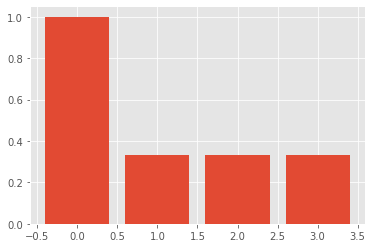

In [125]:
all_recall = [day1_recall, day2_recall, day3_recall, day4_recall]

a=range(0,4)
plt.bar(a,all_recall)
plt.show()

# Retrain the model with day 1,2,3 and 4 data

In [126]:
import numpy as np

In [127]:
col_names = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
             'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
             'job_management', 'job_retired', 'job_self-employed', 'job_services',
             'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
             'marital_married', 'marital_single', 'education_secondary',
             'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
             'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
             'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
             'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
             'poutcome_other', 'poutcome_success', 'poutcome_unknown']

In [128]:
day1df.columns = col_names
day2df.columns = col_names
day3df.columns = col_names
day4df.columns = col_names


In [129]:
retrain_X = pd.concat([X_encoded, day1df, day2df, day3df, day4df], axis=0)

In [130]:
retrain_X.shape

(4521, 42)

In [131]:
Y = np.concatenate((y,day1_actual, day2_actual, day3_Actual, day4_actual), axis=0)

In [132]:
Y.shape

(4521,)

In [133]:
smote=SMOTE(ratio='minority')
X_sm, Y_sm=smote.fit_sample(retrain_X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [134]:
# Spilitting data in to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.3, random_state=1234)

In [135]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5600, 42)
(2400, 42)
(5600,)
(2400,)


In [136]:
d_train = lgb.Dataset(X_train, label=Y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 15
params['min_data'] = 50
params['max_depth'] = 10
clf1 = lgb.train(params, d_train, 100)

In [137]:
final_y_pred=clf1.predict(X_test)

In [139]:
for i in range(0,2400):
    if final_y_pred[i]>=0.5:
       final_y_pred[i]=1
    else:
       final_y_pred[i]=0

In [140]:
print('Accuracy\n',accuracy_score(Y_test,final_y_pred))

Accuracy
 0.89125


In [141]:
print('classification_report\n',classification_report(Y_test, final_y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1186
           1       0.90      0.88      0.89      1214

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.89      0.89      0.89      2400



In [142]:
print('confusion_matrix\n',confusion_matrix(Y_test,final_y_pred))

confusion_matrix
 [[1073  113]
 [ 148 1066]]


#### Compare Recall_score of final model with previous one

In [144]:
print(recall_score(y_test,y_pred))  # First model

0.8848080133555927


In [145]:
print(recall_score(Y_test,final_y_pred))  # Final model

0.8780889621087314


An improvement in recall score is obsevered in the final model built on the entire data
Thus we can retrain our existing model to find performance of the model on more data

# Training a Random Forest Classifier on the entire data

In [146]:
rf=RandomForestClassifier() # Define the classifier

## 6.2 Train a Random Forest model

In [147]:
rf_model=rf.fit(X_train,Y_train)
rf_train_pred=rf_model.predict(X_train)
print(accuracy_score(Y_train,rf_train_pred))

1.0


##### Validate the model on validation data

In [148]:
rf_test_pred=rf_model.predict(X_test)
print(accuracy_score(rf_test_pred,Y_test))

0.9304166666666667


In [149]:
print(confusion_matrix(Y_test,rf_test_pred))
print('classification_report \n',classification_report(rf_test_pred,Y_test))

[[1122   64]
 [ 103 1111]]
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1225
           1       0.92      0.95      0.93      1175

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



#### Recall score of RandomForest model

In [150]:
rf_recall=recall_score(rf_test_pred,Y_test)
rf_recall

0.945531914893617

#### Recall Score of LightGBM model

In [151]:
lightGBM_recall=recall_score(Y_test,final_y_pred)
lightGBM_recall

0.8780889621087314

#### We can conclude that the performance of Random forest is better than LightGBM in terms of all the classification performance metrics

## Let's find ROC-AUC score and curve of Random forest model

In [152]:
predict_probabilities = rf_model.predict_proba(X_test)[:,1]

In [153]:
from sklearn.metrics import roc_auc_score, roc_curve


ROCAUC=roc_auc_score(Y_test, rf_test_pred)
ROCAUC

0.9305968034538035

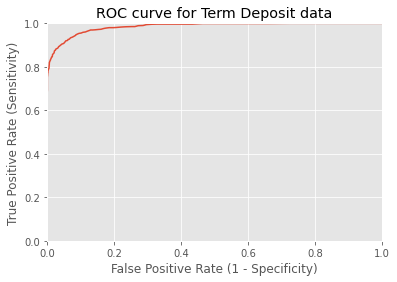

In [154]:
fpr, tpr, thresholds = roc_curve(Y_test, predict_probabilities)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Term Deposit data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()